In [1]:
#%matplotlib inline
#%matplotlib gtk
import sys
sys.path.insert(0, '../')
from pytest import approx
import fconcrete as fc
#from fconcrete import helpers, duplicated, Material, e, Beam, Node, Loads, Nodes, Load,Material, ConcreteBeam, SingleBeamElement, Rectangle, Concrete, Section, ConcreteSteels
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=3, suppress=True, linewidth=3000)

#from math import log

# Tension in MPa
# length in cm
# Shear in kN

In [9]:
material = fc.Concrete(fck='20 MPa', aggressiveness=2)
section = fc.Rectangle(25,44.6, material)

f1 = fc.Load.UniformDistributedLoad(-0.1622, x_begin=0, x_end=113)
f2 = fc.Load.UniformDistributedLoad(-0.4994, x_begin=113, x_end=583)
f3 = fc.Load.UniformDistributedLoad(-0.4196, x_begin=583, x_end=1188)

n1 = fc.Node.SimpleSupport(x=0)
n2 = fc.Node.SimpleSupport(x=113)
n3 = fc.Node.SimpleSupport(x=583)
n4 = fc.Node.SimpleSupport(x=1188)

bar1 = fc.SingleBeamElement([n1, n2], section)
bar2 = fc.SingleBeamElement([n2, n3], section)
bar3 = fc.SingleBeamElement([n3, n4], section)

beam = fc.ConcreteBeam(
    loads = [f1, f2, f3],
    bars = [bar1, bar2, bar3]
)

beam.solve()

In [22]:
dic = {
    
}

In [23]:
dic.get("solve_structural") == False

False

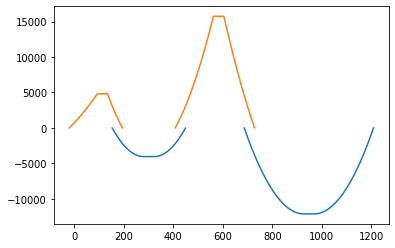

In [10]:
x_decalaged, momentum_positive, momentum_negative = beam.getDecalagedMomentumDiagram()
plt.plot(x_decalaged, -momentum_positive)
plt.plot(x_decalaged, -momentum_negative)
#x, y = beam.getShearDiagram()
#plt.plot(x, y)

In [11]:
self = beam

x_decalaged, momentum_positive, momentum_negative = self.getDecalagedMomentumDiagram()
positive_areas = [self.getSteelArea(x, m) for x, m in zip(x_decalaged, momentum_positive)]
#negative_areas = [self.getSteelArea(x, m) for x, m in zip(x_decalaged, momentum_negative)]

# Rascunho

In [13]:
beam.getSteelAreaDiagram()

(array([ -20.8  ,  -19.611,  -18.422, ..., 1206.422, 1207.611, 1208.8  ]),
 [nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
 

In [12]:
x, necessary_area = beam.getSteelAreaDiagram()
x, y = beam.getComercialSteelAreaDiagram()
number_of_bars = np.array(y)[:,0]
bar_diameter = np.array(y)[:,1]
comercial_area = np.array(y)[:,2]

ValueError: too many values to unpack (expected 2)

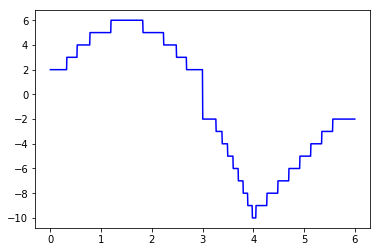

In [14]:
fig, ax1 = plt.subplots()
#ax2 = ax1.twinx()
#ax1.plot(x, comercial_area, 'g-')
ax1.plot(x, number_of_bars, 'b-')
plt.show()

In [70]:
bar_removal = number_of_bars.copy()
for number in np.unique(number_of_bars):
    bar_removal = np.vstack([bar_removal, number*(number_of_bars==number)])
bar_removal = bar_removal[1:]

In [81]:
bar_removal = np.where(bar_removal==0, np.nan, bar_removal)

In [89]:
bar_removal

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

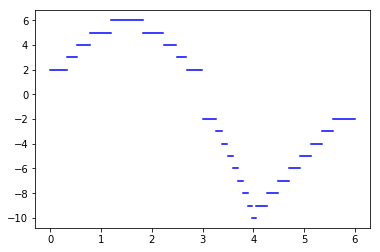

In [88]:
for bar in bar_removal:
    plt.plot(x, bar, 'b')
    
plt.show()

In [57]:
a = np.array([1, 2, 4])
a1 = np.vstack([a, [5,6,6]])
a2 = np.vstack([a1, [5,6,6]])

In [55]:
a2

array([[1, 2, 4],
       [5, 6, 6],
       [5, 6, 6]])

In [35]:
np.array([np.array([[1,2,3],[4,5,6]]),np.array([5,7,8])])

array([array([[1, 2, 3],
       [4, 5, 6]]), array([5, 7, 8])], dtype=object)

In [55]:
x, necessary_area = beam.getSteelAreaDiagram()
x, y = beam.getComercialSteelAreaDiagram()
number_of_bars = np.array(y)[:,0]
bar_diameter = np.array(y)[:,1]
comercial_area = np.array(y)[:,2]

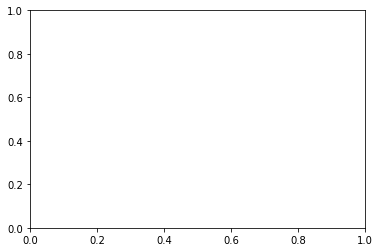

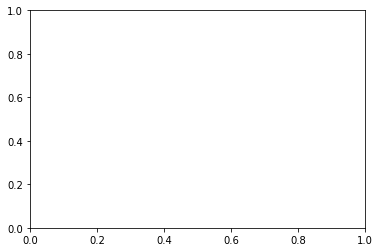

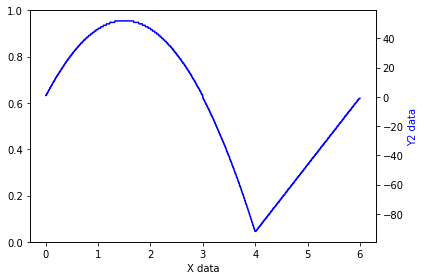

In [69]:
plt.cla()
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
#ax1.plot(x, comercial_area, 'g-')
ax2.plot(x, number_of_bars, 'b-')

ax1.set_xlabel('X data')
#ax1.set_ylabel('Y1 data', color='g')
ax2.set_ylabel('Y2 data', color='b')


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [7]:
gapminder_us = gapminder[gapminder.country=="United States"]

Text(0,0.5,'Y2 data')

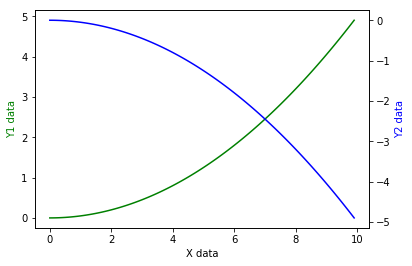

In [49]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0, 10, 0.1)
y1 = 0.05 * x**2
y2 = -1 *y1

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='g')
ax2.set_ylabel('Y2 data', color='b')

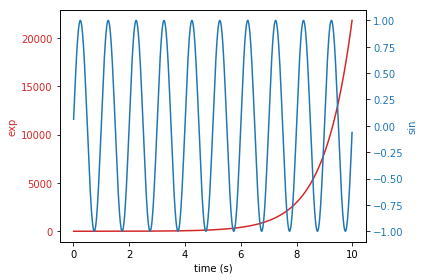

In [67]:
import matplotlib.pyplot as plt

# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
